In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [37]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

Label 4


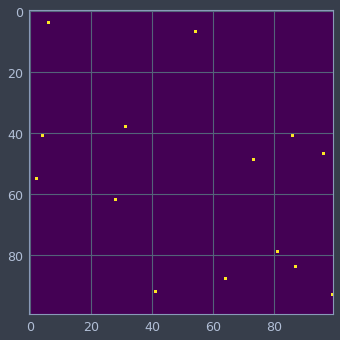

In [48]:
image, label = C.Weber.base10()
print 'Label', label
imshow(image)

Label 4


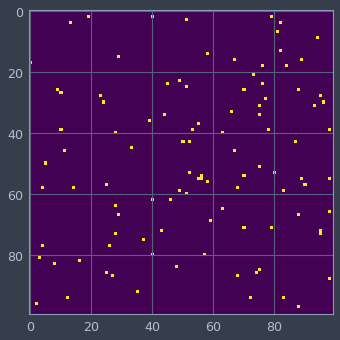

In [52]:
image, label = C.Weber.base100()
print 'Label', label
imshow(image)

Label 5


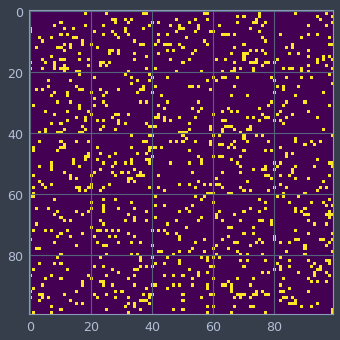

In [58]:
image, label = C.Weber.base1000()
print 'Label', label
imshow(image)

In [62]:
DATATYPE = eval('C.Weber.base10')
NOISE = True

#
train_counter = 0
val_counter = 0
test_counter = 0
train_target = 60000
val_target = 20000
test_target = 20000


X_train = np.zeros((train_target, 100, 100), dtype=np.float32)
y_train = np.zeros((train_target, 1), dtype=np.float32)

X_val = np.zeros((val_target, 100, 100), dtype=np.float32)
y_val = np.zeros((val_target, 1), dtype=np.float32)

X_test = np.zeros((test_target, 100, 100), dtype=np.float32)
y_test = np.zeros((test_target, 1), dtype=np.float32)

t0 = time.time()

all_counter = 0
while train_counter < train_target or val_counter < val_target or test_counter < test_target:
  
  all_counter += 1
  
  image, label = DATATYPE()
  image = image.astype(np.float32)
  
  pot = np.random.choice(3)
  
  if pot == 0 and train_counter < train_target:

    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_train[train_counter] = image
    y_train[train_counter] = label
    train_counter += 1
    
  elif pot == 1 and val_counter < val_target:

    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_val[val_counter] = image
    y_val[val_counter] = label
    val_counter += 1
    
  elif pot == 2 and test_counter < test_target:

    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_test[test_counter] = image
    y_test[test_counter] = label
    test_counter += 1
    
print 'Done', time.time()-t0, 'seconds (', all_counter, 'iterations)'

Done 37.7004451752 seconds ( 179991 iterations)


[ 6.]


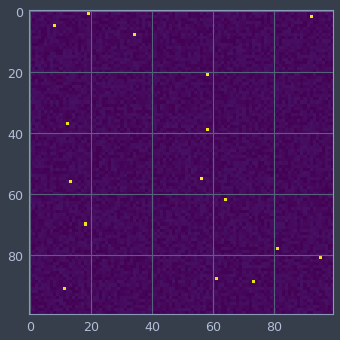

In [68]:
which = np.random.randint(len(X_test))
imshow(X_test[which])
print y_test[which]